In [10]:
import tensorflow as tf
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
print(tf.version.VERSION)

from win32gui import FindWindow, SetForegroundWindow, GetClientRect, ClientToScreen
import pyautogui
import cv2

import tkinter as tk
from PIL import Image, ImageTk

from threading import Thread

from time import time, sleep
from ctypes import windll
from math import sin, cos, radians

from pynput import mouse, keyboard

2.1.0


In [11]:
DATADIR2 = r"D:\K14\Dataset\TestImages.pickle"
DATADIR3 = r"C:\Users\8holz\Dokumente\GitHub\K14\WhiteBox.pickle"
checkpoint_path = "C:/Users/8holz/Dokumente/GitHub/K14/Training_Protocol/Model-Color-UNET-Terrosristhunt/weights/saved_model.pb"
DATADIR4 = r"D:\K14\Dataset\Predicitions.pickle"

checkpoint_dir = os.path.dirname(checkpoint_path)

WindowClassName0 = 'Rainbow Six'
WindowClassName1 = 'J2 - Jupyter Notebook - Google Chrome'

PredImage = None

Thread1Key = False
StopKey = True

In [12]:
data0 = pickle.load(open(DATADIR2, "rb"))
data1 = pickle.load(open(DATADIR3, "rb"))

data = pickle.load(open(DATADIR5, "rb"))

NewImage0 = data[2]

In [13]:
def load_K14():
    #model = create_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    #model.summary()
    model = tf.keras.models.load_model(checkpoint_dir)
    #model.summary()

    configproto = tf.compat.v1.ConfigProto() 
    configproto.gpu_options.allow_growth = True
    sess = tf.compat.v1.Session(config=configproto) 
    tf.compat.v1.keras.backend.set_session(sess)
    return model

In [14]:
model = load_K14(
)

In [15]:
def xyz(image):
    a = time()
    im_preds = model.predict_on_batch(image)
    print(time()-a)
    image = image.reshape(512, 512, 3)
    im_preds = tf.reshape(im_preds, [512, 512, 1]).numpy()
    #ImCompareGray(image, im_preds)
    return im_preds

In [16]:
def ImCompareGray(Im1, Im2, FigSize=(10,10)):
    f = plt.figure(figsize=FigSize)
    f.add_subplot(1,2, 1)
    plt.imshow(Im1, "gray")
    f.add_subplot(1,2, 2)
    plt.imshow(Im2)
    plt.show(block=True)

In [17]:
ListeP = [[],[]]

In [20]:
for im in range(len(data0[0])):
    pred = xyz(data0[0][im].reshape(-1,512,512,3))
    ListeP[0].append(data0[0][im])
    ListeP[1].append(pred)

3.582043170928955
0.0029921531677246094
0.0020194053649902344
0.0020058155059814453
0.001994609832763672
0.002146005630493164
0.002023458480834961
0.001993894577026367
0.0019750595092773438
0.0019936561584472656
0.0009965896606445312
0.0018515586853027344
0.001920461654663086
0.002049684524536133
0.001863241195678711
0.0018930435180664062
0.0020220279693603516
0.0018033981323242188
0.001993894577026367
0.0019941329956054688
0.0019943714141845703
0.0009970664978027344
0.0017638206481933594
0.002021312713623047
0.001994609832763672
0.001995563507080078
0.002991914749145508
0.001995563507080078
0.0019960403442382812
0.0019953250885009766
0.0019948482513427734
0.0019948482513427734
0.0029921531677246094
0.0019943714141845703
0.001995563507080078
0.001996755599975586


In [22]:
pickle.dump(ListeP, open(DATADIR4, "wb"))

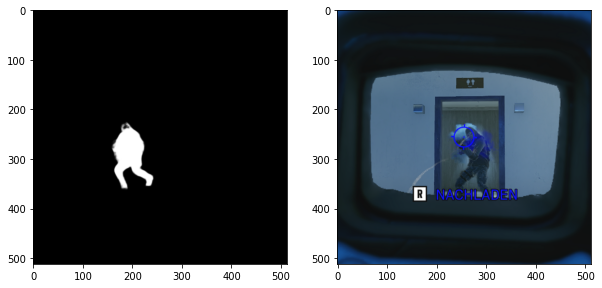

In [9]:
ImCompareGray(pred, data0[0][8])

In [10]:
NewImage0 = (pred[285:295, 190:200])

In [11]:
def ImCompareGray(Im1, Im2, FigSize=(10,10)):
    f = plt.figure(figsize=FigSize)
    f.add_subplot(1,2, 1)
    plt.imshow(Im1, "gray")
    f.add_subplot(1,2, 2)
    plt.imshow(Im2, "gray")
    plt.show(block=True)

In [12]:
print(NewImage0.shape)
print(pred.shape)

(10, 10, 1)
(512, 512, 1)


In [13]:
print(pred[0][0])

[1.9982084e-34]


In [14]:
res = cv2.matchTemplate(pred, NewImage0, cv2.TM_CCOEFF_NORMED)
threshhold = 1
loc = np.where(res >= threshhold)

In [15]:
print(len(loc[0]))

253009


In [16]:
x, y = 200, 200

In [17]:
image = cv2.circle(pred, (x,y), 5, (0,0,255), 2)

In [19]:
cv2.imshow("r", image)

In [17]:
print(len(loc[0]))

253009


In [15]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(pred, pt, (pt[0]+10, pt[1]+10), (0, 255, 255), 2)

In [16]:
cv2.imshow("detected", pred)

In [6]:
def MouseControl(Direction, distance, velocity=5):
    #32 directions
    #512 distances
    #
    Direction=radians(Direction*15)
    x = int(sin(Direction)*velocity)
    y = int(cos(Direction)*velocity)*-1
    for i in range(int(distance/velocity)):
        windll.user32.mouse_event(0x0001, x, y, 0, 0)
        sleep(0.01)

In [9]:
class myThread1(Thread):
	def __init__(self):
		Thread.__init__(self)
		None
	def run(self):
		global Thread1Key, StopKey
		while StopKey:
			if Thread1Key:
				MouseControl(12, 100, 10)
				Thread1Key = False

In [10]:
def on_press(key):
	global Thread1Key, StopKey
	print(str(key))
	try:
		if key.char == "5":
			KeyboardListener.stop()
			StopKey = False
		if key.char == "q" or key.char == "Q":
			Thread1Key = True
	except AttributeError:
		None

In [19]:
KeyboardListener = keyboard.Listener(on_press=on_press)
KeyboardListener.start()

'w'
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
'w'
Key.shift
'A'
'A'
'A'
'A'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'a'
'r'
'a'
'w'
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
Key.shift
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'D'
'A'
'A'
'A'
'A'
'A'
'A'
'A'
'A'
'A'
'D'
'd'
'd

In [31]:
instance = myThread1()
instance.start()

'q''q''q'


'q'
'q'
'q'
'q''q'

'q''q'

'q'
'q'
'q'
'q'
'q'
'q'
'q''q'

'q''q'

'q'
'q'
'q'
'q'
'q'
'q''q'

'q'
'q'
'q''q'

'q'
'q''q'

'q'
'q'
'q'
'q''q'
'q'

'q''q''q'


'q'
'q''q'

'q'
'q'
'q'
'q'
'q'
'q'
'q''q'
'q'

'q'
'q''q'

'q'
'q'
'q'
'q''q'

'q'
'q'
'q'
'q'
'q'
'q''q''q'


'q'
'q''q'

'q'
'q'
'q''q'

'q'
'q'
'q''q''q'


'q'
'q'
'q''q'
'q'

'q''q''q'

'q'

'q''q'

'q'
'q'
'q''q'

'q'
'q'
'q'
'q''q'

'q'
'q'
'q'
'q''q'

'q''q'

'q''q'

'q''q'

'q''q'

'q'
'q''q'

'q'
'q'
'q''q'

'q'
'q'
'q''q'

'q'
'q'
'q''q''q'


'q'
'q''q'

'q'
'q''q'

'q'
'q'
'q''q'

'q''q'

'q''q'

'q'
'q'
'q''q''q'


'q'
'q''q'

'q''q'

'q''q'

'q'
'q'
'q'
'q'
'q''q'

'q'
'q'
'q'
'q'
'q'
'q''q'

'q'
'q''q'

'q''q'

'q''q''q'


'q'
'q''q''q'


'q'
'q''q'

'q'
'q'
'q''q'

'q'
'q'
'q'
'q'
'q''q'

'q'
'q''q'

'q'
'q'
'q''q'

'q'
'q'
'q'
'q''q'

'q''q'

'q''q'

'q''q'
'q''q'


'q''q'
'q'

'q'
'q''q'
'q'

'q'
'q''q''q'


'q'
'q''q'

'q''q'

'q''q'

'q'
'q'
'q'
'q''q'

'q'
'q'
'q'
'q'
'q'
'q'
'q'
'q''q'

'q'
'q''

'w''w'

'w'
'w'
'w''w'
'w'

'w'
'w''w'
'w'

'w'
'w''w'
'w'
'w'

'w''w''w''w'



'w''w'

'w'
'w'
'w'
'w''w'

'w''w'

'w''w'

'w'
'w'
'w''w'

'w'
'w''w'

'w'
'w''w'
'w'

'w'
'w'
'w''w'

'w'
'w'
'w''w'

'w'
'w''w'

'w'
'w'
'w''w'

'w''w'

'w'
'w'
'w'
'w''w'

'w''w'

'w'
'w''w'
'w'

'w''w'

'w''w'

'w'
'w''w'

'w'
'w''w'

'w'
'w'
'w'
'w'
'w'
'w'
'w''w'

'w'
'w''w'

'w'
'w''w''w'


'w'
'w''w''w'


'w'
'w'
'w''w'

'w''w''w'
'w'


'w'
'w''w'

'w'
'w''w'

'w'
'w'
'w'
'w'
'w'
'w'
'w''w'

'w'
'w'
'w''w'

'w'
'w'
'w'
'w''w'
'w'

'w''w'

'w'
'w'
'w''w'
'w''w'


'w'
'w'
'w''w'

'w''w'

'w'
'w'
'w''w'

'w'
'w'
'w''w'

'w'
'w'
'w''w'

'w'
'w'
'w''w'

'w'
'w'
'w'
'w''w'

'w''w'

'w''w'

'w'
'w'
'w''w'

'w''w''w'


'w'
'd'
'd''d''w'


'w'
'd'
'd'
'd'
'w'
'd'
'd'
'd'
'w'
'd''d'

'd'
'w'
'd'
'd'
'w'
'd'
'd''d'

'd'
'd'
'd'
'd''d'

'd'
'd'
'd'
'd'
'd''d'

'd'
'd'
'd''d'

'd'
'd'
'd''d'

'd'
'd'
'd''d'
'd'

'd'
'd''d'

'd'
'd'
'd'
'd'
'd'
'd'
'd'
'd'
'd''d'

'd''d''d'


'd'
'd'
'd'
'd''d'

'd''d'

'd''d'

